In [4]:
# 1fRwoBfZ9ERZQOOLxHid9dFt1oPpvMkGs pib.csv
# 1PXSkAiXTSGLI_ZFFyrEUzjm3_Vi6aVej ideb.csv
# 1iaoOBJICd-0PZPthm0jqDy3djTOIQodV seg_rj.csv

#!pip install gdown
import gdown
gdown.download(id='1fRwoBfZ9ERZQOOLxHid9dFt1oPpvMkGs')
gdown.download(id='1PXSkAiXTSGLI_ZFFyrEUzjm3_Vi6aVej')
gdown.download(id='1iaoOBJICd-0PZPthm0jqDy3djTOIQodV')

Downloading...
From: https://drive.google.com/uc?id=1fRwoBfZ9ERZQOOLxHid9dFt1oPpvMkGs
To: /content/pib.csv
100%|██████████| 8.16M/8.16M [00:00<00:00, 128MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PXSkAiXTSGLI_ZFFyrEUzjm3_Vi6aVej
To: /content/ideb.csv
100%|██████████| 27.5M/27.5M [00:00<00:00, 147MB/s]
Downloading...
From: https://drive.google.com/uc?id=1iaoOBJICd-0PZPthm0jqDy3djTOIQodV
To: /content/seg_rj.csv
100%|██████████| 61.7k/61.7k [00:00<00:00, 34.0MB/s]


'seg_rj.csv'

In [9]:
import pandas as pd

In [12]:
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')
pd.set_option('display.width', 400)
pd.pandas.set_option('display.max_columns', None)

# Exercícios

Vamos trabalhar com dados proveniente de duas fontes diferentes. Considere os dados do Índice de Desenvolvimento da Educação Básica (Ideb) disponíveis em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio) e os dados sobre Produto Interno Bruto (PIB) disponíveis em [PIB](https://basedosdados.org/dataset/br-ibge-pib?bdm_table=municipio).

No conjunto de dados `ideb.csv` vamos selecionar as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, e as colunas `pib` e `impostos_liquidos` do `pib.csv`.

In [63]:
pib_df = pd.read_csv('pib.csv')
print(pib_df.head())

ideb_df = pd.read_csv('ideb.csv')
print(ideb_df.head())

    ano  id_municipio        pib  impostos_liquidos         va  va_agropecuaria  va_industria  va_servicos  va_adespss
0  2002       1100015  111290995            7549266  103741729         27013223       9376871     24651113    42700523
1  2002       1100023  449592816           42665972  406926845         28590178      99922936    161851549   116562182
2  2002       1100031   31767520            1867935   29899585         10883801       1961907      5128876    11925001
3  2002       1100049  474443097           49622951  424820146         32810376      98292764    175748703   117968303
4  2002       1100056   79173614            8200971   70972643         11283793       6651475     25306009    27731366
    ano sigla_uf  id_municipio       rede       ensino  anos_escolares  taxa_aprovacao  indicador_rendimento  nota_saeb_matematica  nota_saeb_lingua_portuguesa  nota_saeb_media_padronizada  ideb  projecao
0  2005       AC       1200302  municipal  fundamental  iniciais (1-5)           

### Atividade 1: Selecione apenas as colunas `ano`, `id_municipio`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb` provenientes dos dados do Ideb, apenas para o ano de 2019 e agrupado por município.

In [64]:
ideb_df = (ideb_df[ideb_df['ano'] == 2019][['ano', 'id_municipio', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa', 'ideb']]).groupby(['id_municipio']).agg('mean')
ideb_df.reset_index()
ideb_df.head()


,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
id_municipio,,,,
1100015,2019.0,253.283750,242.246250,5.050000
1100023,2019.0,248.223750,243.618750,4.762500
1100031,2019.0,229.495000,221.500000,4.850000
1100049,2019.0,259.150000,249.888889,5.200000
1100056,2019.0,266.288571,254.334286,5.642857


### Atividade 2: Selecione as colunas `ano`, `id_municipio`, `pib` e `impostos_liquidos` dos dados do PIB, para o ano de 2019 e agrupado por município.

In [65]:
pib_df = (pib_df[pib_df['ano'] == 2019][['ano', 'id_municipio', 'pib', 'impostos_liquidos']]).groupby(['id_municipio']).agg('mean')
ideb_df.reset_index()
pib_df.head()


,ano,pib,impostos_liquidos
id_municipio,,,
1100015,2019.0,4.956288e+08,29350985.0
1100023,2019.0,2.578830e+09,284397627.0
1100031,2019.0,1.399594e+08,5997974.0
1100049,2019.0,2.260644e+09,253988284.0
1100056,2019.0,5.068545e+08,76671376.0


### Atividade 3: Vamos juntar os dois DataFrames em um único. Para isso, vamos "unir" os dois dataframes pela variável `id_municipio`.

In [97]:
merged_df = pd.merge(ideb_df, pib_df, on='id_municipio')
merged_df.head()


,ano_x,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,ano_y,pib,impostos_liquidos
id_municipio,,,,,,,
1100015,2019.0,253.283750,242.246250,5.050000,2019.0,4.956288e+08,29350985.0
1100023,2019.0,248.223750,243.618750,4.762500,2019.0,2.578830e+09,284397627.0
1100031,2019.0,229.495000,221.500000,4.850000,2019.0,1.399594e+08,5997974.0
1100049,2019.0,259.150000,249.888889,5.200000,2019.0,2.260644e+09,253988284.0
1100056,2019.0,266.288571,254.334286,5.642857,2019.0,5.068545e+08,76671376.0


### Atividade 4:  Verifique se há dados faltantes, além disso verifique se há alguma coluna irrelevante. Se houver, descarte-a.

In [98]:
merged_df = merged_df.drop('ano_y', axis=1)
merged_df.head()

,ano_x,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
id_municipio,,,,,,
1100015,2019.0,253.283750,242.246250,5.050000,4.956288e+08,29350985.0
1100023,2019.0,248.223750,243.618750,4.762500,2.578830e+09,284397627.0
1100031,2019.0,229.495000,221.500000,4.850000,1.399594e+08,5997974.0
1100049,2019.0,259.150000,249.888889,5.200000,2.260644e+09,253988284.0
1100056,2019.0,266.288571,254.334286,5.642857,5.068545e+08,76671376.0


In [99]:
merged_df = merged_df.rename(columns={'ano_x': 'ano'})
merged_df.head()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
id_municipio,,,,,,
1100015,2019.0,253.283750,242.246250,5.050000,4.956288e+08,29350985.0
1100023,2019.0,248.223750,243.618750,4.762500,2.578830e+09,284397627.0
1100031,2019.0,229.495000,221.500000,4.850000,1.399594e+08,5997974.0
1100049,2019.0,259.150000,249.888889,5.200000,2.260644e+09,253988284.0
1100056,2019.0,266.288571,254.334286,5.642857,5.068545e+08,76671376.0


In [100]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 1100015 to 5300108
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          5570 non-null   float64
 1   nota_saeb_matematica         5549 non-null   float64
 2   nota_saeb_lingua_portuguesa  5549 non-null   float64
 3   ideb                         5549 non-null   float64
 4   pib                          5570 non-null   float64
 5   impostos_liquidos            5570 non-null   float64
dtypes: float64(6)
memory usage: 304.6 KB


In [101]:
merged_df = merged_df.fillna(merged_df.mean())
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5570 entries, 1100015 to 5300108
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          5570 non-null   float64
 1   nota_saeb_matematica         5570 non-null   float64
 2   nota_saeb_lingua_portuguesa  5570 non-null   float64
 3   ideb                         5570 non-null   float64
 4   pib                          5570 non-null   float64
 5   impostos_liquidos            5570 non-null   float64
dtypes: float64(6)
memory usage: 304.6 KB


### Atividade 5: Quais são os tipos das variáveis do DataFrame?

In [102]:
merged_df.head()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
id_municipio,,,,,,
1100015,2019.0,253.283750,242.246250,5.050000,4.956288e+08,29350985.0
1100023,2019.0,248.223750,243.618750,4.762500,2.578830e+09,284397627.0
1100031,2019.0,229.495000,221.500000,4.850000,1.399594e+08,5997974.0
1100049,2019.0,259.150000,249.888889,5.200000,2.260644e+09,253988284.0
1100056,2019.0,266.288571,254.334286,5.642857,5.068545e+08,76671376.0


**ano**: categórica ordinal
<br>**nota_saeb_matematica**: quantitativa contínua (pode-se tirar a média das notas)
<br>**nota_saeb_lingua_portuguesa**: quantitativa contínua (pode-se tirar a média das notas)
<br>**ideb**: quantitativa contínua (pode-se tirar a média dos índices ideb das cidades para se chegar a um valor médio do país)
<br>**pib**: quantitativa contínua
<br>**impostos_liquidos**: quantitativa contínua

### Atividade 6: Observando as variáveis envolvidas, você acha que deve existir alguma correlação entre quais delas?

Será que municípios com alta nota no Ideb possuem um PIB alto?

In [103]:
merged_df.corr()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,pib,impostos_liquidos
ano,NaN,NaN,NaN,NaN,NaN,NaN
nota_saeb_matematica,NaN,1.000000,0.960775,0.788224,0.043747,0.039766
nota_saeb_lingua_portuguesa,NaN,0.960775,1.000000,0.725772,0.056340,0.050433
ideb,NaN,0.788224,0.725772,1.000000,0.037104,0.036382
pib,NaN,0.043747,0.056340,0.037104,1.000000,0.981030
impostos_liquidos,NaN,0.039766,0.050433,0.036382,0.981030,1.000000


In [104]:
merged_df[['ideb', 'pib']].corr()

,ideb,pib
ideb,1.000000,0.037104
pib,0.037104,1.000000


In [108]:
merged_df[['ideb']].corr()

,ideb
ideb,1.0


**Segundo os dados como a correlação é *0.037*, consideranmos como não correlacionados, pois é muito baixa.**

### O que significa a correlação das variáveis `id_municipio` e `ideb`?

**Não faz sentido a correlação pois *id_municipio* é uma coluna de tipo categoria nominal e a *ideb* é do tipo numérica contínua**

### Atividade 7: Vamos importar os dados de [Estatística de Segurança Pública do Rio de Janeiro](https://basedosdados.org/dataset/br-isp-estatisticas-seguranca?bdm_table=taxa_evolucao_mensal_uf) e observar os dados do dataframe.

In [141]:
seg_rj_df = pd.read_csv('seg_rj.csv')
seg_rj_df.head()

,ano,mes,mes_ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,2003,1,2003m01,4.01,0.04,0.14,4.19,0.61,4.80,2.48,46.94,1.67,1.11,21.08,9.71,6.58,4.48,20.77,NaN,2.43,4.01,1.17,0.03,0.01,0.12,1.43,NaN,18.09,70.08,13.21,6.69,0.33,5.17,NaN,45.95,71.36,0.01,0.16,0.0,6.02,6.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.71,2.78,0.98,0.02,NaN,NaN,304.90,3.0
1,2003,2,2003m02,3.97,0.03,0.08,4.08,0.76,4.83,2.46,48.32,1.50,1.28,21.83,10.43,6.55,4.70,21.69,NaN,3.02,4.90,1.16,0.08,0.00,0.14,1.59,NaN,18.24,72.38,11.79,5.84,0.36,4.41,NaN,47.95,70.35,0.02,0.20,0.0,5.46,7.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.16,2.89,1.27,0.03,NaN,NaN,309.05,3.0
2,2003,3,2003m03,4.17,0.03,0.11,4.32,0.77,5.08,2.26,47.43,1.61,1.28,20.37,10.46,6.68,4.65,21.79,NaN,2.11,4.36,1.21,0.05,0.01,0.22,1.29,NaN,16.96,67.90,12.48,6.42,0.37,4.40,NaN,51.04,74.71,0.00,0.20,0.0,5.59,7.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.43,3.14,1.06,0.05,NaN,NaN,309.13,3.0
3,2003,4,2003m04,3.98,0.07,0.10,4.15,0.85,5.00,2.02,43.84,1.46,1.41,20.98,10.41,6.85,4.25,21.51,NaN,2.06,4.78,1.15,0.07,0.00,0.25,1.58,NaN,17.99,69.57,11.53,5.31,0.39,3.68,NaN,49.94,70.85,0.02,0.28,0.0,5.57,7.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.29,2.35,0.82,0.03,NaN,NaN,300.72,3.0
4,2003,5,2003m05,4.08,0.04,0.14,4.25,0.65,4.91,2.59,39.77,1.29,1.55,22.34,10.60,7.30,4.51,22.41,NaN,2.35,4.85,1.28,0.02,0.01,0.18,1.86,NaN,19.51,74.01,12.28,5.53,0.39,3.77,NaN,48.91,70.87,0.01,0.39,0.0,5.95,6.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.00,2.84,1.00,0.03,NaN,NaN,310.15,3.0


In [142]:
seg_rj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         222 non-null    int64  
 1   mes                         222 non-null    int64  
 2   mes_ano                     222 non-null    object 
 3   hom_doloso                  222 non-null    float64
 4   lesao_corp_morte            222 non-null    float64
 5   latrocinio                  222 non-null    float64
 6   cvli                        222 non-null    float64
 7   hom_por_interv_policial     222 non-null    float64
 8   letalidade_violenta         222 non-null    float64
 9   tentat_hom                  222 non-null    float64
 10  lesao_corp_dolosa           222 non-null    float64
 11  estupro                     222 non-null    float64
 12  hom_culposo                 222 non-null    float64
 13  lesao_corp_culposa          222 non

### Atividade 8: Filtrar os dados ano de 2020 e selecionar as variáveis: mês, hom_doloso, lesao_corp_morte, latrocinio, cvli, hom_por_interv_policial, e trafico_drogas. Em seguida calcular a correlação de spearman e identificar quais são as correlações fortes e muito fortes (se houver).

In [143]:
seg_rj_df = seg_rj_df[seg_rj_df['ano'] == 2020][['mes', 'ano', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial', 'trafico_drogas']]
seg_rj_df.head()

,mes,ano,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
204,1,2020,2.07,0.02,0.05,2.14,0.90,5.06
205,2,2020,1.88,0.01,0.06,1.95,0.95,5.06
206,3,2020,2.16,0.01,0.05,2.22,0.66,4.70
207,4,2020,1.80,0.03,0.03,1.86,1.03,5.29
208,5,2020,1.57,0.00,0.03,1.61,0.75,5.39


In [144]:
seg_rj_df = seg_rj_df.drop(['ano', 'mes'], axis=1)
seg_rj_df.reset_index()
seg_rj_corr = seg_rj_df.corr('spearman')
seg_rj_corr

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,trafico_drogas
hom_doloso,1.000000,-0.064753,0.423852,0.993007,0.664336,-0.396494
lesao_corp_morte,-0.064753,1.000000,-0.031304,-0.026663,0.159977,0.053513
latrocinio,0.423852,-0.031304,1.000000,0.456180,0.017960,-0.252321
cvli,0.993007,-0.026663,0.456180,1.000000,0.678322,-0.357897
hom_por_interv_policial,0.664336,0.159977,0.017960,0.678322,1.000000,0.249124
trafico_drogas,-0.396494,0.053513,-0.252321,-0.357897,0.249124,1.000000


<Axes: >

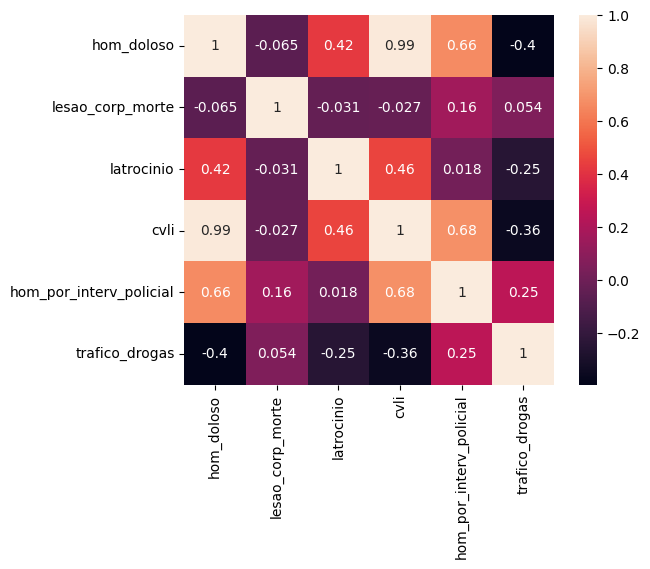

In [148]:
import seaborn as sns
sns.heatmap(seg_rj_corr, annot=True)

**Correlações fortes**: hom_por_interv_policial x hom_doloso (0.66)  |  hom_por_interv_policial x cvli (0.68)
<br>**Correlações muito fortes**: cvil x hom_doloso (0.99)